# Sobre o Dataset

## Food and Goods Deliveries in Brazil
### O que é o Delivery Center


Com seus diversos hubs operacionais espalhados pelo Brasil, o Delivery Center é uma plataforma integra lojistas e marketplaces, criando um ecossistema saudável para vendas de good (produtos) e food (comidas) no varejo brasileiro.

Atualmente temos um cadastro (catálogo + cardápio) com mais de 900 mil itens, milhares de pedidos e entregas são operacionalizados diariamente com uma rede de milhares lojistas e entregadores parceiros espalhados por todas as regiões do país.

Tudo isso gera dados e mais dados a todo momento!

Diante disso, nosso negócio está cada vez data driven, ou seja, utilizando dados para tomar decisões e numa visão de futuro sabemos que utilizar os dados de forma inteligente pode ser o nosso grande diferencial no mercado.

Fonte:https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?select=deliveries.csv

### Variáveis encontradas no Dataset

- ###  Dataset Channels
Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.  
 
__channel_id__: ID do Canal;   
__channel_name__: Nome do Canal;    
__channel_type__: Se é um canal proprio ("OWN CHANNEL") ou se as vendas são realizadas por meio de um "MARKETPLACE".



- ### Deliveries: 
Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.
  
__delivery_id__: ID do delivery;  
__delivery_order_id__:	ID do numéro do pedido;  
__delivery_distance_meters__: Distância do delivery em metros;  
__delivery_status__: Status do delivery. Os Status são divididos em tres tipos:  Entregando ("DELIVERING"), canelado ("CANCELLED") e Entregue ("DELIVERED").

- ### Drivers: 
Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

__driver_id__: ID do motorista;  
__driver_modal__:Tipo de Motorista;  
__driver_type__:Modelo de trabalho do motorista. Se este é "FREELANCE" ou "LOGISTIC OPERATOR", que acredito que seja algo como "CLT".

- ### Orders: 
Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

__order_id__: ID do pedido;  
__store_id__: ID da loja;  
__channel_id__: ID do canal;  
__payment_order_id__: ID do pagamento;  
__delivery_order_id__: ID do delivery;  
__order_status__: Status da ordem. No Dataset possui dois tipos de status: finalizado ("FINISHED") e cancelado ("CANCELED");  
__order_amount__: Valor do pedido;  
__order_delivery_fee__: Taxa de Entrega do pedido;  
__order_delivery_cost__: Custo de Entrega do pedido;  
__order_created_hour__: Hora em que o pedido foi criado;  
__order_created_minute__: Minuto em que o pedido foi criado;  
__order_created_day__: Dia em que o pedido foi criado;  
__order_created_month__: Mês em que o pedido foi criado;  
__order_created_year__: Ano em que o pedido foi criado;  
__order_moment_created__: Data e hora em que o pedido foi criado;  
__order_moment_accepted__: Data e hora em que o pedido foi aceito pela loja;  
__order_moment_ready__: Data e hora em que o pedido ficou pronto na loja;  
__order_moment_collected__: Data e hora em que o pedido foi coletado pela transportadora;  
__order_moment_in_expedition__: Data e hora do momento em que o pedido saiu do estoque;  
__order_moment_delivering__: Data e hora em que o pedido saiu para entrega;  
__order_moment_delivered__: Data e hora em que o pedido foi entregue;  
__order_moment_finished__: Data e hora da finalização do ciclo do pedido (criação até a confirmação de entrega);   
__order_metric_collected_time__: Tempo gasto para a realização da coleta do pedido;  
__order_metric_paused_time__:  Tempo em que o pedido ficou pausado;  
__order_metric_production_time__: Tempo gasto para a produção do pedido;  
__order_metric_walking_time__: Tempo de caminhada (Não sei o que isso quer dizer) ;  
__order_metric_expediton_speed_time__: Tempo gasto até o momento em que o pedido saiudo estoque;  
__order_metric_transit_time__: Tempo gasto no transporte do pedido;  
__order_metric_cycle_time__: Tempo total do pedido (criação ate a confirmação de entrega).  

- ### Hubs: 
Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.  

__hub_id__: ID do centro de Expedição (Hub);  
__hub_name__: Nome do Centro de Expedição;  
__hub_city__: Cidade do Centro de Distribuição;  
__hub_state__: Estado do Centro de Distribuição;  
__hub_latitude__: Latitude do local onde o centro de distribuição se encontra;  
__hub_longitude__: Longitude do local onde o centro de distribuição se encontra.  

- ### Payments: 
Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

__payment_id__: ID do tipo de pagamento realizado;  
__payment_order_id__:ID da ordem de pagamento;   
__payment_amount__: Valor do pagamento;  
__payment_fee__: Taxa do pagamento;  
__payment_method__: Metodo utilizado para realizar o pagamento;  
__payment_status__: Status do pagamento;  

- ### Stores: 
Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

__store_id__: ID da loja;  
__hub_id__: ID do centro de expedição;  
__store_name__: Nome da loja;  
__store_segment__: Segmento da loja;  
__store_plan_price__: Preço do plano da loja;  
__store_latitude__: Latitude do local da loja;  
__store_longitude__: Longitude do local da loja.  

In [3]:
import numpy as np
import pandas as pd
print(np.__version__)



1.24.0


In [2]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\Elaine\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Elaine\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from category_encoders import TargetEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#pra denifir o padrao de cor ggplot

plt.style.use('ggplot')
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Abrindo os datasets

In [4]:
channels =  pl.read_csv('Arquivoskaggle/Delivery/channels.csv')
channels.tail

<bound method DataFrame.tail of shape: (40, 3)
┌────────────┬──────────────┬──────────────┐
│ channel_id ┆ channel_name ┆ channel_type │
│ ---        ┆ ---          ┆ ---          │
│ i64        ┆ str          ┆ str          │
╞════════════╪══════════════╪══════════════╡
│ 1          ┆ OTHER PLACE  ┆ OWN CHANNEL  │
│ 2          ┆ PHONE PLACE  ┆ OWN CHANNEL  │
│ 3          ┆ WHATS PLACE  ┆ OWN CHANNEL  │
│ 4          ┆ FACE PLACE   ┆ OWN CHANNEL  │
│ 5          ┆ FOOD PLACE   ┆ MARKETPLACE  │
│ …          ┆ …            ┆ …            │
│ 44         ┆ READY PLACE  ┆ OWN CHANNEL  │
│ 46         ┆ CHOCO PLACE  ┆ OWN CHANNEL  │
│ 47         ┆ PORTO PLACE  ┆ MARKETPLACE  │
│ 48         ┆ CENTER PLACE ┆ MARKETPLACE  │
│ 49         ┆ RIBA PLACE   ┆ OWN CHANNEL  │
└────────────┴──────────────┴──────────────┘>

In [5]:
deliveries =  pl.read_csv('Arquivoskaggle/Delivery/deliveries.csv')
deliveries.tail

<bound method DataFrame.tail of shape: (378_843, 5)
┌─────────────┬───────────────────┬───────────┬──────────────────────────┬─────────────────┐
│ delivery_id ┆ delivery_order_id ┆ driver_id ┆ delivery_distance_meters ┆ delivery_status │
│ ---         ┆ ---               ┆ ---       ┆ ---                      ┆ ---             │
│ i64         ┆ i64               ┆ i64       ┆ i64                      ┆ str             │
╞═════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════════════╡
│ 2174658     ┆ 68413340          ┆ 8378      ┆ 5199                     ┆ DELIVERED       │
│ 2174660     ┆ 68414309          ┆ 2473      ┆ 410                      ┆ DELIVERED       │
│ 2174661     ┆ 68416230          ┆ 7615      ┆ 3784                     ┆ DELIVERED       │
│ 2174663     ┆ 68412721          ┆ 8378      ┆ 5714                     ┆ DELIVERED       │
│ 2174675     ┆ 68414018          ┆ 10463     ┆ 3746                     ┆ DELIVERED       │
│ …           ┆ … 

In [6]:
drivers =  pl.read_csv('Arquivoskaggle/Delivery/drivers.csv')
drivers.tail

<bound method DataFrame.tail of shape: (4_824, 3)
┌───────────┬──────────────┬───────────────────┐
│ driver_id ┆ driver_modal ┆ driver_type       │
│ ---       ┆ ---          ┆ ---               │
│ i64       ┆ str          ┆ str               │
╞═══════════╪══════════════╪═══════════════════╡
│ 133       ┆ MOTOBOY      ┆ LOGISTIC OPERATOR │
│ 138       ┆ MOTOBOY      ┆ FREELANCE         │
│ 140       ┆ MOTOBOY      ┆ FREELANCE         │
│ 143       ┆ BIKER        ┆ FREELANCE         │
│ 148       ┆ MOTOBOY      ┆ FREELANCE         │
│ …         ┆ …            ┆ …                 │
│ 66260     ┆ MOTOBOY      ┆ FREELANCE         │
│ 66271     ┆ BIKER        ┆ FREELANCE         │
│ 66457     ┆ MOTOBOY      ┆ LOGISTIC OPERATOR │
│ 66459     ┆ MOTOBOY      ┆ LOGISTIC OPERATOR │
│ 66494     ┆ MOTOBOY      ┆ FREELANCE         │
└───────────┴──────────────┴───────────────────┘>

In [7]:
orders =  pl.read_csv('Arquivoskaggle/Delivery/orders.csv')
orders.tail

<bound method DataFrame.tail of shape: (368_999, 29)
┌──────────┬──────────┬────────────┬───────────────┬───┬───────────────┬───────────────┬───────────────┬───────────────┐
│ order_id ┆ store_id ┆ channel_id ┆ payment_order ┆ … ┆ order_metric_ ┆ order_metric_ ┆ order_metric_ ┆ order_metric_ │
│ ---      ┆ ---      ┆ ---        ┆ _id           ┆   ┆ walking_time  ┆ expediton_spe ┆ transit_time  ┆ cycle_time    │
│ i64      ┆ i64      ┆ i64        ┆ ---           ┆   ┆ ---           ┆ ed_t…         ┆ ---           ┆ ---           │
│          ┆          ┆            ┆ i64           ┆   ┆ f64           ┆ ---           ┆ f64           ┆ f64           │
│          ┆          ┆            ┆               ┆   ┆               ┆ f64           ┆               ┆               │
╞══════════╪══════════╪════════════╪═══════════════╪═══╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│ 68405119 ┆ 3512     ┆ 5          ┆ 68405119      ┆ … ┆ null          ┆ null          ┆ null       

In [8]:
payments =  pl.read_csv('Arquivoskaggle/Delivery/payments.csv')
payments['payment_status'].unique()

payment_status
str
"""AWAITING"""
"""PAID"""
"""CHARGEBACK"""


In [9]:
hubs =  pl.read_csv('Arquivoskaggle/Delivery/hubs.csv', encoding='ISO-8859-1')

hubs.tail()

hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
i64,str,str,str,f64,f64
73,"""HUBLESS SHOPPING""","""SÃO PAULO""","""SP""",-22.947461,-43.183467
75,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
85,"""REACT SHOPPING""","""SÃO PAULO""","""SP""",-23.513353,-46.618353
86,"""R SHOPPING""","""SÃO PAULO""","""SP""",-23.541502,-46.576618
91,"""GAROA SHOPPING""","""SÃO PAULO""","""SP""",-23.525124,-46.546807


In [10]:
stores =  pl.read_csv('Arquivoskaggle/Delivery/stores.csv', encoding='ISO-8859-1')
stores.tail()

store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
i64,i64,str,str,f64,f64,f64
4669,21,"""CIRUMOI ""","""GOOD""",29.0,-23.550407,-46.721291
4671,25,"""CIRUMOI ""","""GOOD""",49.9,-23.570765,-46.642043
4675,13,"""SIMUI LIMOI ""","""GOOD""",29.0,-22.887521,-43.283366
4676,75,"""PAMACIS ""","""GOOD""",49.9,-25.477073,-49.28966
4679,85,"""PIGUE PIPACO ""","""FOOD""",49.9,-23.513353,-46.61849


In [11]:
pnull_latitudes = stores['store_latitude'].is_null().sum()
null_longitudes = stores['store_longitude'].is_null().sum()

null_longitudes


16

\- __Mesclando os datasets__

Agora iremos mesclar todos os datasets para posterior análises. A mesclagem aqui, assim como a abertura do dataset será feita por meio da biblioteca Polars. 
A polars foi escolhida por tornar todo o processo mais rápido, visto que consome menos ram que a pandas para grande volume de dados.

In [12]:
 
result = orders.join(channels, on="channel_id", how="left")
result2 = result.join(deliveries, on = "delivery_order_id", how = "left")
result3 = result2.join(drivers, on = "driver_id", how = "left")
result4 = result3.join(payments, on = "payment_order_id", how = "left")
result5 = result4.join(stores, on = "store_id", how = "left")
result6 = result5.join(hubs, on = "hub_id", how = "left")

result6.head(20)

order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time,channel_name,channel_type,delivery_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,payment_id,payment_amount,payment_fee,payment_method,payment_status,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
i64,i64,i64,i64,i64,str,f64,f64,f64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,str,str,str,i64,f64,f64,str,str,i64,str,str,f64,f64,f64,str,str,str,f64,f64
68405119,3512,5,68405119,68405119,"""CANCELED""",62.7,0.0,null,0,1,1,1,2021,"""1/1/2021 12:01:36 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,75,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405123,3512,5,68405123,68405123,"""CANCELED""",62.7,0.0,null,0,4,1,1,2021,"""1/1/2021 12:04:26 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,75,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405206,3512,5,68405206,68405206,"""CANCELED""",115.5,0.0,null,0,13,1,1,2021,"""1/1/2021 12:13:07 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,75,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405465,3401,5,68405465,68405465,"""CANCELED""",55.9,0.0,null,0,19,1,1,2021,"""1/1/2021 12:19:15 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,43,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769
68406064,3401,5,68406064,68406064,"""CANCELED""",37.9,0.0,null,0,26,1,1,2021,"""1/1/2021 12:26:25 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,43,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
68412148,294,5,68412148,68412148,"""CANCELED""",34.0,6.9,null,14,2,1,1,2021,"""1/1/2021 2:02:01 PM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,13,"""PAPA SUCIS ""","""FOOD""",0.0,-22.88582,-43.279218,"""HIP HOP SHOPPING""","""RIO DE JANEIRO""","""RJ""",-22.88582,-43.279218
68412322,294,5,68412322,68412322,"""CANCELED""",39.3,9.9,null,14,6,1,1,2021,"""1/1/2021 2:06:31 PM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,13,"""PAPA SUCIS ""","""FOOD""",0.0,-22.88582,-43.279218,"""HIP HOP SHOPPING""","""RIO DE JANEIRO""","""RJ""",-22.88582,-43.279218
68412444,294,5,68412444,68412444,"""

\- __Verificando os tipos__

Após abrir todos os Datasets e mescla-los por meio das IDs correspondentes, vamos verificar o tipo de cada coluna. Essa verificação é importante para saber se será necessário alterar alguma(s) para posterior análises.

In [13]:
result6.schema


Schema([('order_id', Int64),
        ('store_id', Int64),
        ('channel_id', Int64),
        ('payment_order_id', Int64),
        ('delivery_order_id', Int64),
        ('order_status', String),
        ('order_amount', Float64),
        ('order_delivery_fee', Float64),
        ('order_delivery_cost', Float64),
        ('order_created_hour', Int64),
        ('order_created_minute', Int64),
        ('order_created_day', Int64),
        ('order_created_month', Int64),
        ('order_created_year', Int64),
        ('order_moment_created', String),
        ('order_moment_accepted', String),
        ('order_moment_ready', String),
        ('order_moment_collected', String),
        ('order_moment_in_expedition', String),
        ('order_moment_delivering', String),
        ('order_moment_delivered', String),
        ('order_moment_finished', String),
        ('order_metric_collected_time', Float64),
        ('order_metric_paused_time', Float64),
        ('order_metric_production_time', 

## Tratando os dados

In [14]:
result6.columns

['order_id',
 'store_id',
 'channel_id',
 'payment_order_id',
 'delivery_order_id',
 'order_status',
 'order_amount',
 'order_delivery_fee',
 'order_delivery_cost',
 'order_created_hour',
 'order_created_minute',
 'order_created_day',
 'order_created_month',
 'order_created_year',
 'order_moment_created',
 'order_moment_accepted',
 'order_moment_ready',
 'order_moment_collected',
 'order_moment_in_expedition',
 'order_moment_delivering',
 'order_moment_delivered',
 'order_moment_finished',
 'order_metric_collected_time',
 'order_metric_paused_time',
 'order_metric_production_time',
 'order_metric_walking_time',
 'order_metric_expediton_speed_time',
 'order_metric_transit_time',
 'order_metric_cycle_time',
 'channel_name',
 'channel_type',
 'delivery_id',
 'driver_id',
 'delivery_distance_meters',
 'delivery_status',
 'driver_modal',
 'driver_type',
 'payment_id',
 'payment_amount',
 'payment_fee',
 'payment_method',
 'payment_status',
 'hub_id',
 'store_name',
 'store_segment',
 'store

In [15]:
ptdata= {

'order_status':'Status da Ordem' ,
'order_amount':'valor_do_pedido' ,
'order_delivery_fee': 'taxa_de_entrega_do_pedido',
'order_delivery_cost': 'custo_de_entrega_do_pedido',
'order_delivery_cost': 'custo_de_entrega_do_pedido',
'order_created_hour': 'hora_de_criação_do_pedido', 
'order_created_minute': 'minuto_de_criação_do_pedido', 
'order_created_day':'dia_de_criação_do_pedido',
'order_created_month': 'mês_de_criação_do_pedido', 
'order_created_year':'ano_de_criação_do_pedido',
 
'order_moment_created':'momento_do_pedido_criado', 
'order_moment_accepted': 'momento_do_pedido_aceito',
'order_moment_ready': 'momento_do_pedido_pronto',
'order_moment_collected': 'momento_do_pedido_coletado',
'order_moment_in_expedition':'momento_do_pedido_em_expedição', 
'order_moment_delivering': 'momento_do_pedido_entregando',
'order_moment_delivered': 'momento_do_pedido_entregue', 
'order_moment_finished': 'momento_do_pedido_concluído',    
    

'order_metric_collected_time':'tempo_de_coleta_da_métrica_do_pedido', 
'order_metric_paused_time': 'tempo_de_pausa_da_métrica_do_pedido',
'order_metric_production_time': 'tempo_de_produção_da_métrica_do_pedido', 
'order_metric_walking_time': 'tempo_de_caminhada_da_métrica_do_pedido',
'order_metric_expediton_speed_time': 'tempo_de_velocidade_do_pedido', 
'order_metric_transit_time': 'tempo_de_trânsito_do_pedido',
'order_metric_cycle_time':'tempo_de_ciclo_da_métrica_do_pedido',    
'channel_name': 'Nome do Canal',
'channel_type':'Tipo de Canal'
  
   
}

ptdataset = result6.rename(ptdata)
ptdataset.head(2)



order_id,store_id,channel_id,payment_order_id,delivery_order_id,Status da Ordem,valor_do_pedido,taxa_de_entrega_do_pedido,custo_de_entrega_do_pedido,hora_de_criação_do_pedido,minuto_de_criação_do_pedido,dia_de_criação_do_pedido,mês_de_criação_do_pedido,ano_de_criação_do_pedido,momento_do_pedido_criado,momento_do_pedido_aceito,momento_do_pedido_pronto,momento_do_pedido_coletado,momento_do_pedido_em_expedição,momento_do_pedido_entregando,momento_do_pedido_entregue,momento_do_pedido_concluído,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido,Nome do Canal,Tipo de Canal,delivery_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,payment_id,payment_amount,payment_fee,payment_method,payment_status,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
i64,i64,i64,i64,i64,str,f64,f64,f64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,str,str,str,i64,f64,f64,str,str,i64,str,str,f64,f64,f64,str,str,str,f64,f64
68405119,3512,5,68405119,68405119,"""CANCELED""",62.7,0.0,null,0,1,1,1,2021,"""1/1/2021 12:01:36 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,75,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405123,3512,5,68405123,68405123,"""CANCELED""",62.7,0.0,null,0,4,1,1,2021,"""1/1/2021 12:04:26 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,null,null,null,75,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966


In [16]:
dataset = ptdataset.drop(
    [ 'store_id', 'channel_id', 'payment_order_id','delivery_order_id', 'delivery_id','driver_id', 'payment_id', 'hub_id',
    ])
dataset.head(20)

order_id,Status da Ordem,valor_do_pedido,taxa_de_entrega_do_pedido,custo_de_entrega_do_pedido,hora_de_criação_do_pedido,minuto_de_criação_do_pedido,dia_de_criação_do_pedido,mês_de_criação_do_pedido,ano_de_criação_do_pedido,momento_do_pedido_criado,momento_do_pedido_aceito,momento_do_pedido_pronto,momento_do_pedido_coletado,momento_do_pedido_em_expedição,momento_do_pedido_entregando,momento_do_pedido_entregue,momento_do_pedido_concluído,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido,Nome do Canal,Tipo de Canal,delivery_distance_meters,delivery_status,driver_modal,driver_type,payment_amount,payment_fee,payment_method,payment_status,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
i64,str,f64,f64,f64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,f64,f64
68405119,"""CANCELED""",62.7,0.0,null,0,1,1,1,2021,"""1/1/2021 12:01:36 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405123,"""CANCELED""",62.7,0.0,null,0,4,1,1,2021,"""1/1/2021 12:04:26 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405206,"""CANCELED""",115.5,0.0,null,0,13,1,1,2021,"""1/1/2021 12:13:07 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405465,"""CANCELED""",55.9,0.0,null,0,19,1,1,2021,"""1/1/2021 12:19:15 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769
68406064,"""CANCELED""",37.9,0.0,null,0,26,1,1,2021,"""1/1/2021 12:26:25 AM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
68412148,"""CANCELED""",34.0,6.9,null,14,2,1,1,2021,"""1/1/2021 2:02:01 PM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""PAPA SUCIS ""","""FOOD""",0.0,-22.88582,-43.279218,"""HIP HOP SHOPPING""","""RIO DE JANEIRO""","""RJ""",-22.88582,-43.279218
68412322,"""CANCELED""",39.3,9.9,null,14,6,1,1,2021,"""1/1/2021 2:06:31 PM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""PAPA SUCIS ""","""FOOD""",0.0,-22.88582,-43.279218,"""HIP HOP SHOPPING""","""RIO DE JANEIRO""","""RJ""",-22.88582,-43.279218
68412444,"""CANCELED""",41.5,9.9,null,14,8,1,1,2021,"""1/1/2021 2:08:11 PM""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""PAPA SUCIS ""","""FOOD""",0.0,-22.88582,-43.279218,"""HIP HOP SHOPPING""","""RIO DE JANEIRO""","""RJ""",-22.

In [17]:
#convertendo colunas de data hora de String para Datetime
colunas_para_converter = [
    
'momento_do_pedido_criado',
'momento_do_pedido_aceito',
'momento_do_pedido_pronto', 
'momento_do_pedido_coletado',
'momento_do_pedido_em_expedição',
'momento_do_pedido_entregando',
'momento_do_pedido_entregue',
'momento_do_pedido_concluído' 
]


df = dataset.with_columns([
    pl.col(col).str.strptime(pl.Datetime, format="%d/%m/%Y %I:%M:%S %p",strict=False ) for col in colunas_para_converter
])



df.head(5)
    

order_id,Status da Ordem,valor_do_pedido,taxa_de_entrega_do_pedido,custo_de_entrega_do_pedido,hora_de_criação_do_pedido,minuto_de_criação_do_pedido,dia_de_criação_do_pedido,mês_de_criação_do_pedido,ano_de_criação_do_pedido,momento_do_pedido_criado,momento_do_pedido_aceito,momento_do_pedido_pronto,momento_do_pedido_coletado,momento_do_pedido_em_expedição,momento_do_pedido_entregando,momento_do_pedido_entregue,momento_do_pedido_concluído,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido,Nome do Canal,Tipo de Canal,delivery_distance_meters,delivery_status,driver_modal,driver_type,payment_amount,payment_fee,payment_method,payment_status,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
i64,str,f64,f64,f64,i64,i64,i64,i64,i64,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,f64,f64
68405119,"""CANCELED""",62.7,0.0,null,0,1,1,1,2021,2021-01-01 00:01:36,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405123,"""CANCELED""",62.7,0.0,null,0,4,1,1,2021,2021-01-01 00:04:26,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405206,"""CANCELED""",115.5,0.0,null,0,13,1,1,2021,2021-01-01 00:13:07,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966
68405465,"""CANCELED""",55.9,0.0,null,0,19,1,1,2021,2021-01-01 00:19:15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769
68406064,"""CANCELED""",37.9,0.0,null,0,26,1,1,2021,2021-01-01 00:26:25,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769


In [18]:
# Convertendo a coluna 'order_id' para string, logo que esta é uma categorica e não uma coluna numerica.
df = df.with_columns([
    pl.col('order_id').cast(pl.Utf8)
])


In [19]:
# Calculando a diferença entre as duas colunas datetime e criando uma nova coluna. 
# Esta coluna foi criada para verificar o ciclo do pedido em dias e horas.

dt = df.with_columns([
    (pl.col('momento_do_pedido_concluído') - pl.col('momento_do_pedido_criado')).alias('tempo total do pedido')
])


# Exibir as primeiras linhas do DataFrame com a nova coluna
dt.head(10)

order_id,Status da Ordem,valor_do_pedido,taxa_de_entrega_do_pedido,custo_de_entrega_do_pedido,hora_de_criação_do_pedido,minuto_de_criação_do_pedido,dia_de_criação_do_pedido,mês_de_criação_do_pedido,ano_de_criação_do_pedido,momento_do_pedido_criado,momento_do_pedido_aceito,momento_do_pedido_pronto,momento_do_pedido_coletado,momento_do_pedido_em_expedição,momento_do_pedido_entregando,momento_do_pedido_entregue,momento_do_pedido_concluído,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido,Nome do Canal,Tipo de Canal,delivery_distance_meters,delivery_status,driver_modal,driver_type,payment_amount,payment_fee,payment_method,payment_status,store_name,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,tempo total do pedido
str,str,f64,f64,f64,i64,i64,i64,i64,i64,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,str,str,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,f64,f64,duration[μs]
"""68405119""","""CANCELED""",62.7,0.0,null,0,1,1,1,2021,2021-01-01 00:01:36,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966,null
"""68405123""","""CANCELED""",62.7,0.0,null,0,4,1,1,2021,2021-01-01 00:04:26,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966,null
"""68405206""","""CANCELED""",115.5,0.0,null,0,13,1,1,2021,2021-01-01 00:13:07,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""GOI SIPIMUSU ""","""FOOD""",49.0,-25.477073,-49.28966,"""PYTHON SHOPPING""","""CURITIBA""","""PR""",-25.477073,-49.28966,null
"""68405465""","""CANCELED""",55.9,0.0,null,0,19,1,1,2021,2021-01-01 00:19:15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769,null
"""68406064""","""CANCELED""",37.9,0.0,null,0,26,1,1,2021,2021-01-01 00:26:25,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""FRUEOU ""","""FOOD""",49.9,-25.441221,-49.27769,"""HOTMILK SHOPPING""","""CURITIBA""","""PR""",-25.441221,-49.27769,null
"""68408108""","""CANCELED""",80.0,9.9,null,0,56,1,1,2021,2021-01-01 00:56:19,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""LU PUMAM RICIRIMS ""","""GOOD""",49.9,-23.579067,-46.594006,"""COFFEE SHOPPING""","""SÃO PAULO""","""SP""",-23.579067,-46.59282,null
"""68408109""","""CANCELED""",71.0,9.9,null,0,56,1,1,2021,2021-01-01 00:56:49,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""FOOD PLACE""","""MARKETPLACE""",null,null,null,null,null,null,null,null,"""PIZ RUSMIURIMA ""","""FOOD""",49.0,-30.085743,-51.245997,"""BLACK SHOPPING""","""PORTO ALEGRE""","""RS""",-30.085743,-51.245997,null
"""68409030""","""CANCELED""",214.8,0.01,0.0,1,56,1,1,2021,2021-01-01 01:56:42,2021-01-01 01:57:00,null,null,null,null,null,null,null,null,null,null,null,null,null,"""BRAZIL PLACE""","""MARKETPLACE""",1723,"""CANCELLED""",null,null,null,null,null,null,"""GRIME CRU ""","""GOOD""",4

# Localização das lojas e dos centros de distribuição

### Centros de Distribuição localizados por cidades (Hubs)

In [20]:
import folium

In [21]:
dtpandas = dt.to_pandas()
groupehubcount = dtpandas.groupby('hub_city')['hub_latitude'].nunique()
groupehubcount 

hub_city
CURITIBA           4
PORTO ALEGRE       4
RIO DE JANEIRO     9
SÃO PAULO         15
Name: hub_latitude, dtype: int64

A cidade com maior quantidade de Hubs é São Paulo seguido do Rio de Janeiro.

In [22]:
mapa = folium.Map(location=[hubs['hub_latitude'][0], hubs['hub_longitude'][0]], zoom_start=12)

for lat, lon in zip(hubs['hub_latitude'], hubs['hub_longitude']):
    folium.Marker(location=[lat, lon]).add_to(mapa)

mapa


### Lojas por Cidade

In [23]:
storesconvert = stores.to_pandas()
hubsconvert = hubs.to_pandas()
resultado02 = pd.merge(storesconvert, hubsconvert, on='hub_id', how='left', suffixes=('_store', '_hub'))
resultado02['latlong'] = resultado02['store_latitude'] + resultado02['store_longitude']
resultado03 =  resultado02.groupby('hub_city')['latlong'].nunique()
resultado03


hub_city
CURITIBA           5
PORTO ALEGRE      10
RIO DE JANEIRO    42
SÃO PAULO         46
Name: latlong, dtype: int64

A quantidade de lojas não tem relação direta com a quantidade de hubs.

In [25]:
storesdrop = stores.drop_nulls(subset=['store_latitude', 'store_longitude'])
storestopd = storesdrop.to_pandas()


for lat, lon in zip(storestopd['store_latitude'], storestopd['store_longitude']):
    folium.Marker(location=[lat, lon]).add_to(mapa)

mapa

# Estatistica Descritiva

In [26]:
#Verificando estatisticas descritivas para a coluna criada de 'Tempo total do pedido'

out = dt.select(
    [
        pl.sum('tempo total do pedido').alias('Soma Tempo total do pedido'),
        pl.min('tempo total do pedido').alias('Mínimo Tempo total do pedido'),
        pl.max('tempo total do pedido').alias('Máximo Tempo total do pedido'),
        pl.std('tempo total do pedido').alias('Desvio Padrão Tempo total do pedido'),
        pl.col('tempo total do pedido').max().alias('Máximo  de Tempo total do pedido')
    ]
)
print(out)

shape: (1, 5)
┌─────────────────────┬───────────────────────┬───────────────────────────────┬─────────────────────┬──────────────────┐
│ Soma Tempo total do ┆ Mínimo Tempo total do ┆ Máximo Tempo total do pedido  ┆ Desvio Padrão Tempo ┆ Máximo  de Tempo │
│ pedido              ┆ pedido                ┆ ---                           ┆ total do p…         ┆ total do pedi…   │
│ ---                 ┆ ---                   ┆ duration[μs]                  ┆ ---                 ┆ ---              │
│ duration[μs]        ┆ duration[μs]          ┆                               ┆ duration[μs]        ┆ duration[μs]     │
╞═════════════════════╪═══════════════════════╪═══════════════════════════════╪═════════════════════╪══════════════════╡
│ 662466d 22h 22m 45s ┆ -272d -6h -15m -6s    ┆ 274d 23h 39m 16s              ┆ 12d 11h 34m 32s     ┆ 274d 23h 39m 16s │
│                     ┆                       ┆                               ┆ 840171µs            ┆                  │
└─────────────────

Vemos que  o tempo minimo esta em negativo em -272, o tempo máximo em 274 dias. Isso pode ser algum erro no Dataset ou má gestão do pedido. 
Isto precisa ser verificado posteriormente para que possamos entender se é um desvio normal ou um erro.

In [27]:
dtpandas = dt.to_pandas()

In [28]:
dtpandas.head()

,order_id,Status da Ordem,valor_do_pedido,taxa_de_entrega_do_pedido,custo_de_entrega_do_pedido,hora_de_criação_do_pedido,minuto_de_criação_do_pedido,dia_de_criação_do_pedido,mês_de_criação_do_pedido,ano_de_criação_do_pedido,...,store_segment,store_plan_price,store_latitude,store_longitude,hub_name,hub_city,hub_state,hub_latitude,hub_longitude,tempo total do pedido
0,68405119,CANCELED,62.7,0.0,NaN,0,1,1,1,2021,...,FOOD,49.0,-25.477073,-49.28966,PYTHON SHOPPING,CURITIBA,PR,-25.477073,-49.28966,NaT
1,68405123,CANCELED,62.7,0.0,NaN,0,4,1,1,2021,...,FOOD,49.0,-25.477073,-49.28966,PYTHON SHOPPING,CURITIBA,PR,-25.477073,-49.28966,NaT
2,68405206,CANCELED,115.5,0.0,NaN,0,13,1,1,2021,...,FOOD,49.0,-25.477073,-49.28966,PYTHON SHOPPING,CURITIBA,PR,-25.477073,-49.28966,NaT
3,68405465,CANCELED,55.9,0.0,NaN,0,19,1,1,2021,...,FOOD,49.9,-25.441221,-49.27769,HOTMILK SHOPPING,CURITIBA,PR,-25.441221,-49.27769,NaT
4,68406064,CANCELED,37.9,0.0,NaN,0,26,1,1,2021,...,FOOD,49.9,-25.441221,-49.27769,HOTMILK SHOPPING,CURITIBA,PR,-25.441221,-49.27769,NaT


### Distribuição de Pedidos por Status:

In [29]:
groupedStatus = dtpandas.groupby('Status da Ordem')['tempo total do pedido'].describe()
groupedStatus


,count,mean,std,min,25%,50%,75%,max
Status da Ordem,,,,,,,,
CANCELED,557,12 days 14:34:50.244165,17 days 23:46:51.696583,0 days 00:00:28,0 days 00:50:56,0 days 02:29:24,30 days 00:12:56,122 days 20:58:51
FINISHED,159455,4 days 02:39:09.780809,12 days 10:46:16.785963,-273 days +17:44:54,0 days 00:33:58,0 days 00:45:01,0 days 01:09:14,274 days 23:39:16


\- Nós máximos e minimos verificamos alguns outliers que podem estar corretos como podem ser erro no dataset.Estes casos precisam ser analisados a parte.    
\- Em std vemos que pode haver uma grande dispersão dos dados variando entre 12 a 17 dias. Depedendo do tipo do produto entregue isso pode ser normal ou não.  
\- Com relação ao primeiro quartil (25%) vemos que 25% dos pedidos ou menos levam em média 34 min para serem entregues e 50 até serem cancelados.  
\- Com relação ao segundo quartil (50%) vemos que 50% dos pedidos levam 45 minutos ou menos até serem finalizados e 2H30 para serem cancelados.  
\- Sobre o terceiro quartil (75%) vemos que 75% dos pedidos ou menos levam  1h para serem entregues e até 30 dias para serem cancelados.  

De modo geral, há uma tolerância grande até o cancelamento de pedidos e o tempo total de um pedido finalizado é de 1H.

### Distribuição de pedidos por Cidade (Hub_city)

Aparentemente o tempo total do pedido (criação do pedido até a entrega) demora mais nas cidades de Porto Alegre e São Paulo

In [30]:
groupedcity = dtpandas.groupby('hub_city')['tempo total do pedido'].describe()
groupedcity


,count,mean,std,min,25%,50%,75%,max
hub_city,,,,,,,,
CURITIBA,12515,2 days 12:09:54.661206,8 days 13:45:42.563470,-1 days +23:59:58,0 days 00:28:59,0 days 00:37:09,0 days 00:53:08,119 days 07:20:26
PORTO ALEGRE,16028,4 days 03:00:17.283191,11 days 01:07:57.194202,-273 days +17:44:54,0 days 00:30:29,0 days 00:42:06,0 days 01:10:14,90 days 23:20:42
RIO DE JANEIRO,62681,3 days 21:22:48.116079,11 days 07:44:48.576722,-212 days +01:05:44,0 days 00:36:05,0 days 00:47:40,0 days 01:11:47,274 days 23:39:16
SÃO PAULO,68788,4 days 16:01:43.641347,14 days 05:56:14.390043,-272 days +11:28:50,0 days 00:34:11,0 days 00:44:51,0 days 01:10:49,243 days 02:29:22


Verificamos aqui as mesmas estatísticas, mas por cidade.  Mas de modo geral, o tempo total é menor em Curitiba.
Isso pode ter acontecido tanto pela cidade ser menor, como pelo centro de distribuição estar mais proximos dos pontos de entrega. De toda forma, não é uma diferença tão significante quando comparado com as outras cidades.

In [31]:
groupecitycount = dtpandas.groupby('hub_city')['order_id'].count()
groupecitycount_df = groupecitycount.reset_index()

print(groupecitycount_df)

         hub_city  order_id
0        CURITIBA     37440
1    PORTO ALEGRE     43025
2  RIO DE JANEIRO    165631
3       SÃO PAULO    196143


<module 'matplotlib.pyplot' from 'C:\\Users\\Elaine\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

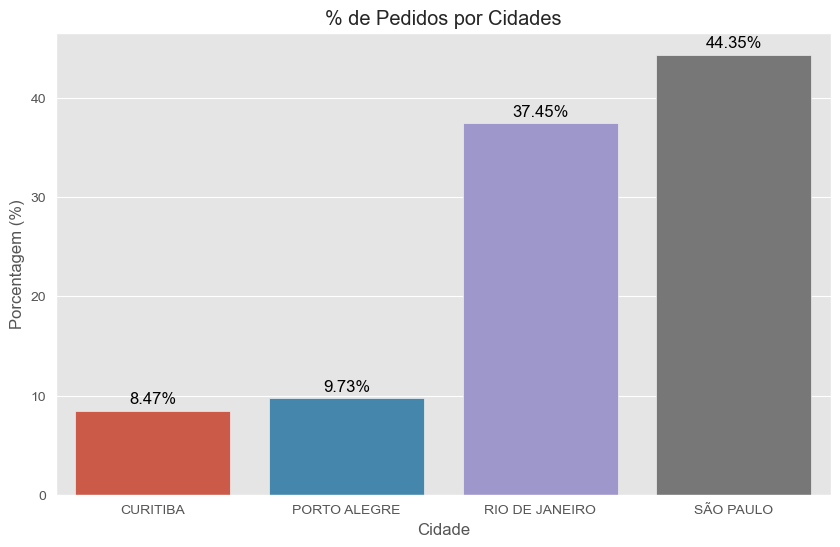

In [32]:
#Plotando a % de pedidos por cidade


# Agrupando e contando os valores de 'order_id' por 'hub_city'
groupecitycount = dtpandas.groupby('hub_city')['order_id'].count()

# Calculando a porcentagem
groupecitycount_df = groupecitycount.reset_index()
groupecitycount_df['percent'] = (groupecitycount_df['order_id'] / groupecitycount_df['order_id'].sum()) * 100

# Plotando o gráfico de barras com porcentagem
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='hub_city', y='percent', data=groupecitycount_df)

# Adicionando valores no topo das barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Exibindo o gráfico
plt.title("% de Pedidos por Cidades")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Cidade")
plt

A quantidade de pedidos é consideravelmente maior nas cidades do Rio de Janeiro e São Paulo.

### Há relação entre o hub e os cancelamentos?

In [52]:
hubscancelamentos = dtpandas.groupby(['hub_city', 'hub_name', 'Status da Ordem'])['order_id'].count()
groupecitycount_df = hubscancelamentos.reset_index()


cancelados_df = groupecitycount_df[groupecitycount_df['Status da Ordem'] == 'CANCELED']


# Contagem total de ordens por hub_city e hub_name
total_orders = dtpandas.groupby(['hub_city', 'hub_name'])['order_id'].count().reset_index()
total_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Mesclar a contagem total de ordens com o dataframe de cancelamentos
cancelados_df = cancelados_df.merge(total_orders, on=['hub_city', 'hub_name'], how='left')

cancelados_df['% Cancelados'] = (cancelados_df['order_id'] / cancelados_df['total_orders']) * 100
cancelados_df['% Cancelados'] = cancelados_df['% Cancelados'].round(1)


cancelados_df


,hub_city,hub_name,Status da Ordem,order_id,total_orders,% Cancelados
0,CURITIBA,FORTRAN SHOPPING,CANCELED,463,12677,3.7
1,CURITIBA,HOTMILK SHOPPING,CANCELED,193,9047,2.1
2,CURITIBA,PHP SHOPPING,CANCELED,173,5778,3.0
3,CURITIBA,PYTHON SHOPPING,CANCELED,498,9938,5.0
4,PORTO ALEGRE,BLACK SHOPPING,CANCELED,508,16998,3.0
5,PORTO ALEGRE,BLUE SHOPPING,CANCELED,13,13,100.0
6,PORTO ALEGRE,GREEN SHOPPING,CANCELED,883,26012,3.4
7,PORTO ALEGRE,RED SHOPPING,CANCELED,2,2,100.0
8,RIO DE JANEIRO,BEACH SHOPPING,CANCELED,599,18733,3.2
9,RIO DE JANEIRO,COLOR SHOPPING,CANCELED,169,5943,2.8


Há hubs nas cidades de Rio de Janeiro, São Paulo e Curitiba que possuem 100% dos pedidos cancelados, mas também são hubs com o menor número de pedidos. De modo geral, os cancelamentos não passam de 5%. O que demonstra uma certa eficiência dos hubs.

### Há preferência por tipo de transporte utilizado em cada cidade?

In [25]:
groupedcitymodal = dtpandas.groupby(['hub_city', 'driver_modal'] )['order_id'].count().reset_index()
groupedcitymodal2 = dtpandas.groupby(['hub_city'] )['order_id'].count().reset_index()
groupedcitymodal


,hub_city,driver_modal,order_id
0,CURITIBA,BIKER,4824
1,CURITIBA,MOTOBOY,29595
2,PORTO ALEGRE,BIKER,5378
3,PORTO ALEGRE,MOTOBOY,35591
4,RIO DE JANEIRO,BIKER,61427
5,RIO DE JANEIRO,MOTOBOY,94602
6,SÃO PAULO,BIKER,40626
7,SÃO PAULO,MOTOBOY,142384


O tipo de transporte de preferência é a Moto em sua totalidade. No entanto, no Rio de Janeiro é visto uma diferença menor entre o uso de bike e moto quando comparado com outras cidades.

### Há relação entre distância média dos pedidos com o cancelamento levando em consideração o tipo de transporte utilizado?

In [30]:
groupedcitymodal = dtpandas.groupby(['hub_city','Status da Ordem', 'driver_modal'] )['delivery_distance_meters'].mean().reset_index()
groupedcitymodal

,hub_city,Status da Ordem,driver_modal,delivery_distance_meters
0,CURITIBA,CANCELED,BIKER,1550.916667
1,CURITIBA,CANCELED,MOTOBOY,4325.561644
2,CURITIBA,FINISHED,BIKER,1437.243142
3,CURITIBA,FINISHED,MOTOBOY,3266.003015
4,PORTO ALEGRE,CANCELED,BIKER,1321.862069
5,PORTO ALEGRE,CANCELED,MOTOBOY,3934.395652
6,PORTO ALEGRE,FINISHED,BIKER,1184.392971
7,PORTO ALEGRE,FINISHED,MOTOBOY,3708.244640
8,RIO DE JANEIRO,CANCELED,BIKER,1144.021097
9,RIO DE JANEIRO,CANCELED,MOTOBOY,3448.500000


Cancelamentos parecem não ter relação com o tipo de transporte utilizado, visto que a média de distância para bicicleta é menor para os dois tipos de Status

#### E com o Tempo Total do  Pedido?

In [33]:
groupedcitymodal = dtpandas.groupby(['hub_city','Status da Ordem', 'driver_modal'] )['tempo total do pedido'].mean().reset_index()
groupedcitymodal

,hub_city,Status da Ordem,driver_modal,tempo total do pedido
0,CURITIBA,CANCELED,BIKER,16 days 21:22:59.428571
1,CURITIBA,CANCELED,MOTOBOY,18 days 23:05:57.750000
2,CURITIBA,FINISHED,BIKER,1 days 10:26:28.811454
3,CURITIBA,FINISHED,MOTOBOY,2 days 14:25:50.043957
4,PORTO ALEGRE,CANCELED,BIKER,9 days 21:08:52.444444
5,PORTO ALEGRE,CANCELED,MOTOBOY,10 days 04:05:34.574074
6,PORTO ALEGRE,FINISHED,BIKER,2 days 19:56:30.557816
7,PORTO ALEGRE,FINISHED,MOTOBOY,4 days 03:01:52.062682
8,RIO DE JANEIRO,CANCELED,BIKER,15 days 10:15:19.088888
9,RIO DE JANEIRO,CANCELED,MOTOBOY,12 days 09:50:22.140625


Aparentemente o tempo total do pedido tem relação com os cancelamentos, independente do tipo de transporte utilizado em cada cidade

####  Quais fatores mais influenciam o tempo de entrega total?

In [85]:
groupedcitymodal = dtpandas.groupby(['Status da Ordem', 'driver_modal'])[
    ['tempo_de_coleta_da_métrica_do_pedido',
     'tempo_de_pausa_da_métrica_do_pedido',
     'tempo_de_produção_da_métrica_do_pedido',
     'tempo_de_caminhada_da_métrica_do_pedido',
     'tempo_de_velocidade_do_pedido',
     'tempo_de_trânsito_do_pedido',
     'tempo_de_ciclo_da_métrica_do_pedido']
].mean().reset_index()

groupedcitymodal.head()


,Status da Ordem,driver_modal,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido
0,CANCELED,BIKER,2.148006,7.984488,23.909782,3.902240,11.931560,172.964223,211.894296
1,CANCELED,MOTOBOY,2.661808,13.094338,23.090128,4.559150,17.547806,155.906480,205.925679
2,FINISHED,BIKER,2.027102,5.293460,20.950456,3.940904,9.854804,52.558474,83.627578
3,FINISHED,MOTOBOY,2.844483,10.841997,46.908995,4.938041,21.652476,62.305133,142.603444


A produção leva um tempo consideravel no tempo total, no entanto, o que tem acarretado na demora de entrega é o tempo de entrega.

In [190]:
groupedcitymodaltime = dtpandas.groupby(['hub_city','Status da Ordem', 'driver_modal'])[
    ['tempo_de_coleta_da_métrica_do_pedido',
     'tempo_de_pausa_da_métrica_do_pedido',
     'tempo_de_produção_da_métrica_do_pedido',
     'tempo_de_caminhada_da_métrica_do_pedido',
     'tempo_de_velocidade_do_pedido',
     'tempo_de_trânsito_do_pedido',
     'tempo_de_ciclo_da_métrica_do_pedido']
].mean().reset_index()

groupedcitymodaltime.head()

,hub_city,Status da Ordem,driver_modal,tempo_de_coleta_da_métrica_do_pedido,tempo_de_pausa_da_métrica_do_pedido,tempo_de_produção_da_métrica_do_pedido,tempo_de_caminhada_da_métrica_do_pedido,tempo_de_velocidade_do_pedido,tempo_de_trânsito_do_pedido,tempo_de_ciclo_da_métrica_do_pedido
0,CURITIBA,CANCELED,BIKER,1.600000,1.710000,11.113333,3.866364,5.372222,29.822500,41.528000
1,CURITIBA,CANCELED,MOTOBOY,3.058036,11.657727,26.702754,4.772340,23.147119,98.237551,143.778679
2,CURITIBA,FINISHED,BIKER,2.010932,2.941512,17.076475,3.990979,8.073024,16.974720,42.065870
3,CURITIBA,FINISHED,MOTOBOY,2.644921,6.010797,20.974699,5.032952,14.930671,20.918023,57.615033
4,PORTO ALEGRE,CANCELED,BIKER,1.092353,6.500000,17.638750,1.187059,8.054783,87.004286,236.287083


### Qual a forma de pagamento mais utilizada para as compras?

<module 'matplotlib.pyplot' from 'C:\\Users\\Elaine\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

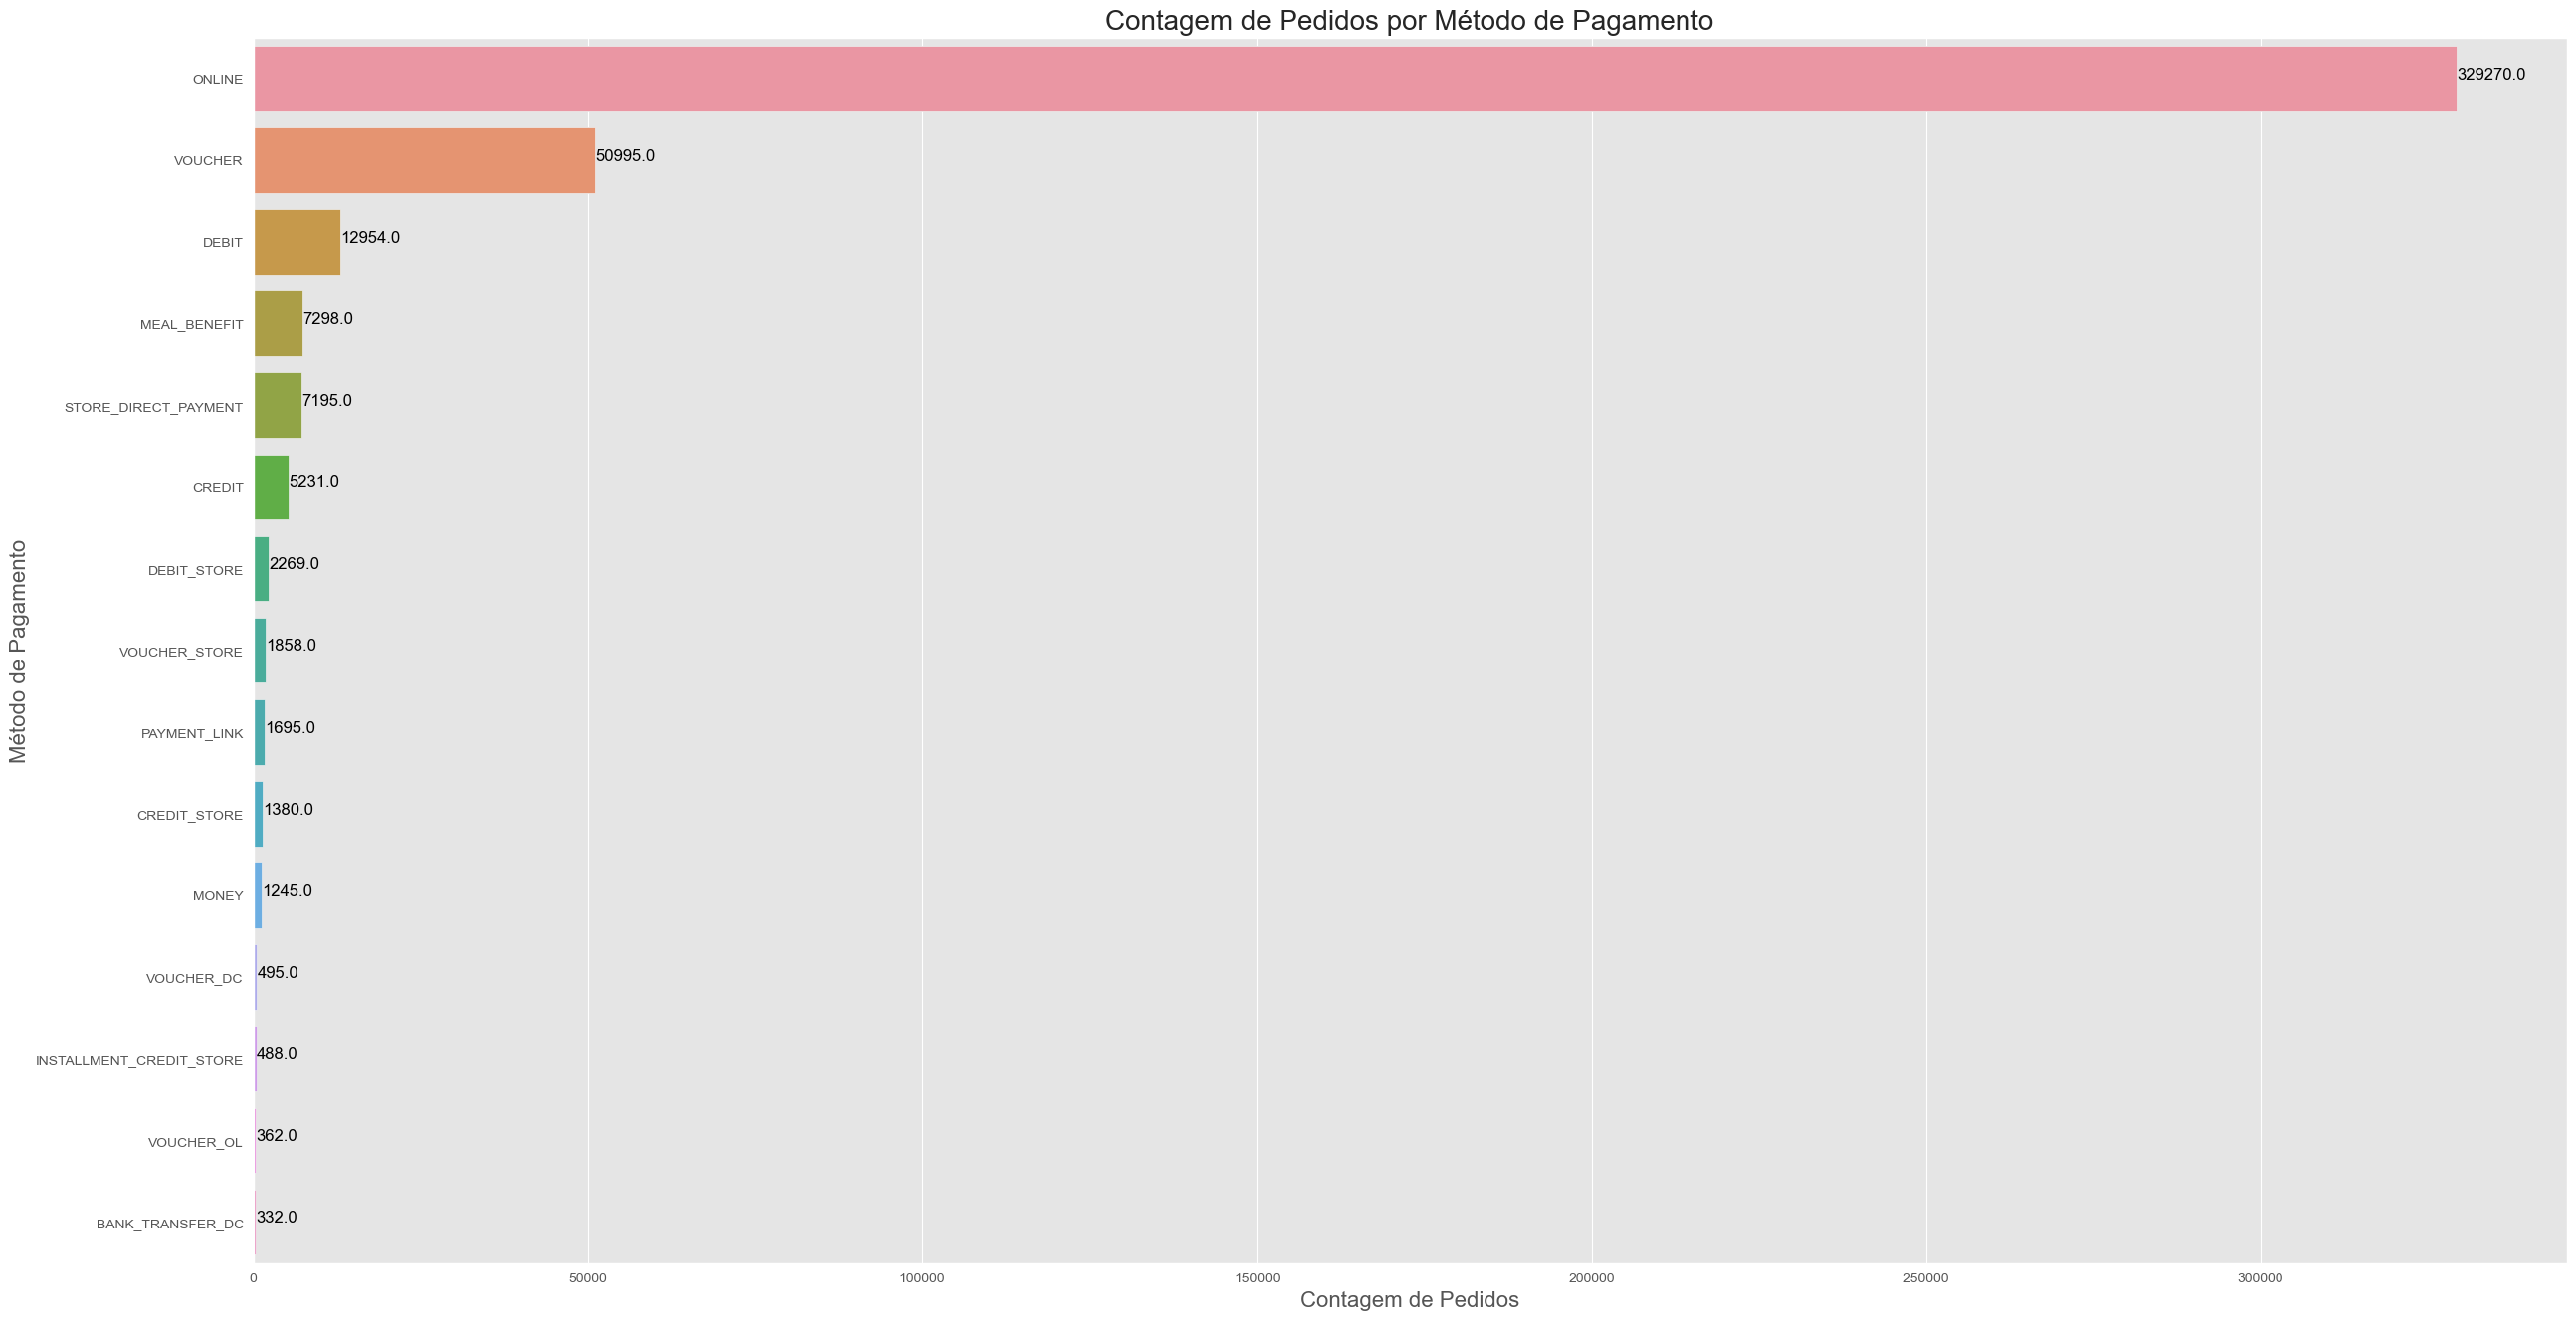

In [69]:
# Fazendo o groupby pela coluna 'payment_method' e contando 'order_id'
groupedcitymodalpay = dtpandas.groupby('payment_method')['order_id'].count().reset_index()

# Ordenando do maior para o menor pela contagem de 'order_id'
groupedcitymodalpay = groupedcitymodalpay.sort_values(by='order_id', ascending=False)

# Plotando o gráfico de barras horizontal com porcentagem
plt.figure(figsize=(30, 16))
ax = sns.barplot(x='order_id', y='payment_method', data=groupedcitymodalpay, orient='h')

# Adicionando valores no final das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 50, p.get_y() + p.get_height() / 2), fontsize=12, color='black')

# Exibindo o gráfico
plt.title("Contagem de Pedidos por Método de Pagamento", fontsize=20)
plt.xlabel("Contagem de Pedidos", fontsize=16)
plt.ylabel("Método de Pagamento", fontsize=16)
plt

#### Qual é o valor médio dos pedidos para cada método de pagamento ?

O valor médio dos pedidos tem uma relação direta com o metodo de pagamento escolhido

<module 'matplotlib.pyplot' from 'C:\\Users\\Elaine\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

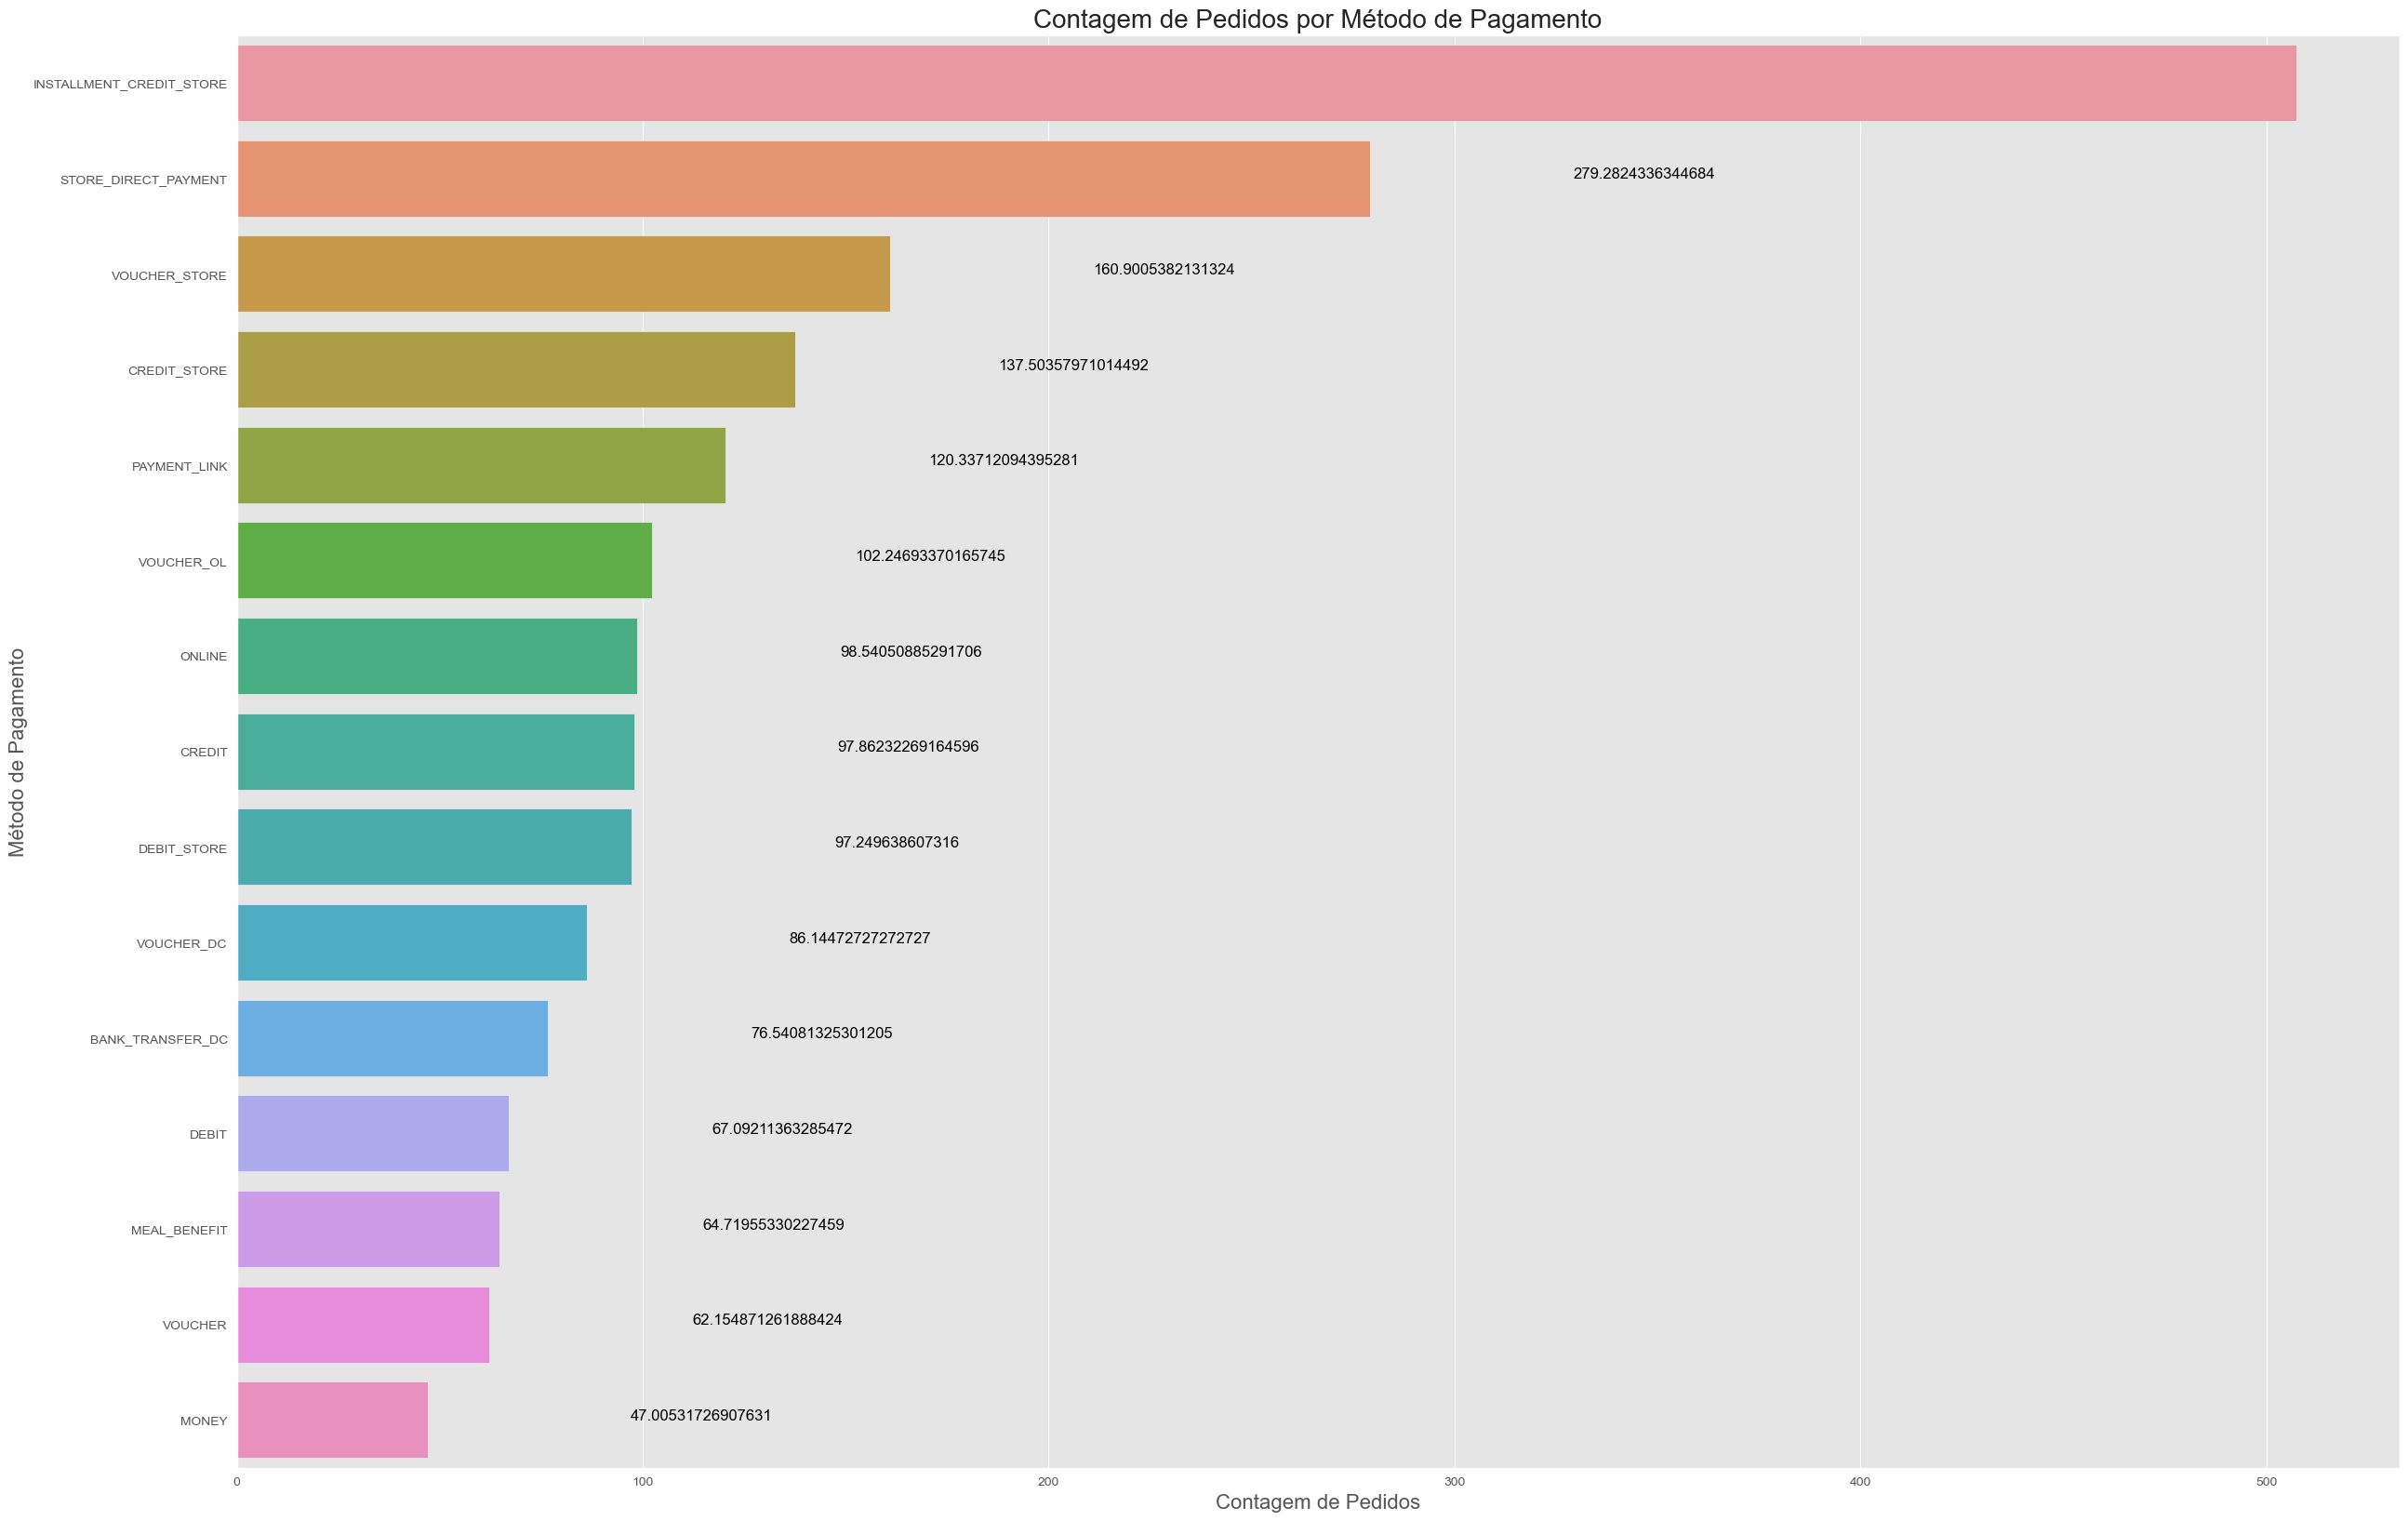

In [70]:
# Fazendo o groupby pela coluna 'payment_method' e contando 'order_id'
groupedcitymodalpay = dtpandas.groupby('payment_method')['valor_do_pedido'].mean().reset_index()

# Ordenando do maior para o menor pela contagem de 'order_id'
groupedcitymodalpay = groupedcitymodalpay.sort_values(by='valor_do_pedido', ascending=False)

# Plotando o gráfico de barras horizontal com porcentagem
plt.figure(figsize=(30, 20))
ax = sns.barplot(x='valor_do_pedido', y='payment_method', data=groupedcitymodalpay, orient='h')

# Adicionando valores no final das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 50, p.get_y() + p.get_height() / 2), fontsize=12, color='black')

# Exibindo o gráfico
plt.title("Contagem de Pedidos por Método de Pagamento", fontsize=20)
plt.xlabel("Contagem de Pedidos", fontsize=16)
plt.ylabel("Método de Pagamento", fontsize=16)
plt

### Método de preferência por cidade

In [106]:
groupedpayment = dtpandas.groupby(['payment_method', 'hub_city'])[
    ['valor_do_pedido']
].mean().reset_index()

groupedpayment.head()


,payment_method,hub_city,valor_do_pedido
0,BANK_TRANSFER_DC,CURITIBA,76.137333
1,BANK_TRANSFER_DC,PORTO ALEGRE,60.661111
2,BANK_TRANSFER_DC,RIO DE JANEIRO,72.744901
3,BANK_TRANSFER_DC,SÃO PAULO,85.393923
4,CREDIT,CURITIBA,106.956379


Aparentemente o tipo de pagamento de preferencia de grande parte dos hubs é a transferência bancária, com exceção de curitiba que possui preferência por pagamento no crédito.

## Conclusão

\- Hubs por cidade  
A quantidade de hubs não esta diretamente relacionada com a quantidade de lojas presentes em cada cidade. 
A cidade de Curitiba é a cidade que possui uma maior desproporção de hubs por loja, possuindo quase que um hub por loja, e isso, não tem relação direta com a quantidade de pedidos gerados em cada cidade, logo que Curitiba é a cidade que possui menos pedidos,também sendo a menor em extensão.  

\- Cancelamentos  
De modo geral, não há preferência por tipo de transporte, com exceção da cidade do Rio de Janeiro que parece quase que igualar o uso dos dois tipos de transporte.  

Sobre a distância a ser percorrida por cada tipo de transporte, parece não haver uma relação direta com cancelamentos. A unica relação que vemos com a distância é a de que o condutor que utiliza bicicletas parece sempre percorrer uma distância menor do que quem utiliza moto. Os pedidos mais curtos podem estar sendo direcionados para quem utiliza mais bicicletas do que motos.  

Já o tempo total do pedido, desde a sua criação até a entrega tem uma relação com os cancelamentos, independente do tipo de transporte utilizado havendo também uma tolerância maior que 8 dias até o cancelamento.  

\- Tempo gasto em cada etapa  
Apesar da preparação do pedido levar um tempo consideravel, o tempo gasto no transporte  acaba sendo consideravelmente maior que o de preparo e todas as outras etapas.  Inclusive, nos pedidos com Status Cancelado é o que vemos a maior disparidade com relação aos finalizados, até mesmo para cidade de Curitiba que possui a maior quantidade de hubs por lojas.  


\- Forma de Pagamento  
Quanto a forma de pagamento, vemos uma preferência geral por pagamento online e uso de voucher, no entando, quando verificamos a preferencia por cidade vemos uma preferência quase que geral por transferência bancária, com exceção de curitiba que possui preferencia por pagamento no crédito.  

##### Considerações Finais
Seria necessário entender a quantidade de hubs por cidade, visto que a quantidade de hubs em Curitiba e em Porto Alegre são bem maiores que as outras, mas possuindo praticamente o mesmo nivel de eficiência dos outros hubs.
